#  Import Libraries

## Work Done
#### Load pandas, seaborn, matplotlib, and numpy for data manipulation and visualization.

## Logic
#### Essential libraries needed for data analysis, visualization, and mathematical operations.

---

#  Load Dataset

## Work Done
#### Read Anime.csv file into a pandas DataFrame.

## Logic
#### Load the dataset that contains anime information including members, episodes, ratings, etc.

#### ---

#  Data Inspection

## Work Done
#### - Display first 3 rows using `head(3)`
#### - Check null values using `isnull().sum()`

## Logic
#### Understand dataset structure and identify missing data before preprocessing.

#### ---

#  Visualize Feature Distributions

## Work Done
#### - Create histogram for "members" column
#### - Create histogram for "episodes" column

## Logic
#### Visualize data distribution to identify skewness and outliers. Skewed data may need transformation.

#### ---

#  Outlier Detection using IQR Method

## Work Done
```
q1 = dataset["members"].quantile(0.25)
q3 = dataset["members"].quantile(0.75)
iqr = q3 - q1
```

## Logic
#### Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Interquartile Range) to identify outlier thresholds.

#### ---

#  Calculate Outlier Boundaries

## Work Done
```
min_r = q1 - (1.5 * iqr)
max_r = q3 + (1.5 * iqr)
```

## Logic
Set lower and upper limits. Values beyond max_r are extreme outliers. The 1.5 factor is standard statistical threshold.

---

#  Remove Outliers

## Work Done
```
dataset[dataset["members"] <= max_r]
```

## Logic
Filter dataset to keep only rows where members value is below maximum threshold, removing extreme outliers.

---

#  Visualize After Outlier Removal

## Work Done
Create histogram of "members" after outlier removal.

## Logic
Compare distribution before and after removal to verify outlier exclusion. Distribution should look cleaner.

---

#  Import FunctionTransformer

## Work Done
```
from sklearn.preprocessing import FunctionTransformer
```

## Logic
FunctionTransformer applies custom functions to transform features. Useful for log, square, exponential, etc. transformations.

---

#  Apply Log Transformation

## Work Done
```
ft = FunctionTransformer(func=np.log1p)
ft.fit(dataset[["members"]])
dataset["members_tf"] = ft.transform(dataset[["members"]])
```

## Logic
- `np.log1p`: Applies log(1+x) transformation
- **Purpose**: Reduce skewness in right-skewed data
- **Effect**: Compress large values, spread small values
- **Why**: Makes skewed data more normally distributed for better model performance

---

#  Compare Before & After Log Transformation (Distplot)

## Work Done
Create side-by-side distribution plots showing original vs. log-transformed data.

## Logic
Visualize how log transformation changes distribution shape. Original data is right-skewed; transformed data is more symmetric.

---

#  Compare Before & After Log Transformation (Histogram)

## Work Done
Create side-by-side histograms with KDE showing original vs. log-transformed data.

## Logic
Alternative visualization to confirm log transformation effect. Histogram provides clearer bin representation than distplot.

---

#  Apply Square Transformation

## Work Done
```
ft1 = FunctionTransformer(func= lambda x : x**2)
ft1.fit(dataset[["members"]])
dataset["members_tf1"] = ft1.transform(dataset[["members"]])
```

## Logic
- **Lambda function**: `x**2` squares each value
- **Effect**: Amplify differences between values (opposite of log)
- **Use case**: Increase impact of larger values
- **Result**: Increases skewness even more (left-skewed distribution)

---

#  Compare Before & After Square Transformation

## Work Done
Create side-by-side distribution plots showing original vs. square-transformed data.

## Logic
Visualize square transformation effect. Data becomes left-skewed as large values are amplified further.

---

#  Summary: When to Use Each Transformation

## Log Transformation (np.log1p)
- **Use for**: Right-skewed data (long tail on right)
- **Effect**: Reduces skewness, makes data more normal
- **Best for**: Features with exponential growth pattern

## Square Transformation (x**2)
- **Use for**: When you want to amplify differences
- **Effect**: Increases skewness, emphasizes outliers
- **Best for**: Rare, specific use cases (usually not recommended)

## Key Rule
- **Right-skewed data** → Use log transformation
- **Left-skewed data** → Use square root or reciprocal
- **Nearly normal data** → No transformation needed

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dataset = pd.read_csv("Anime.csv")

In [6]:
dataset.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,NaN,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,NaN,9.25,114262


In [8]:
dataset.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      2
rating      230
members       0
dtype: int64

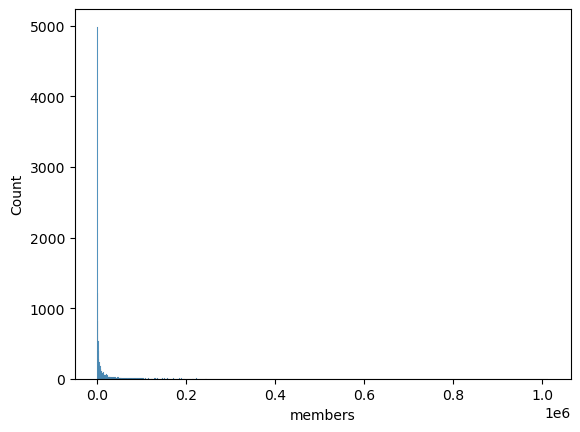

In [10]:
sns.histplot(dataset["members"])
plt.show()

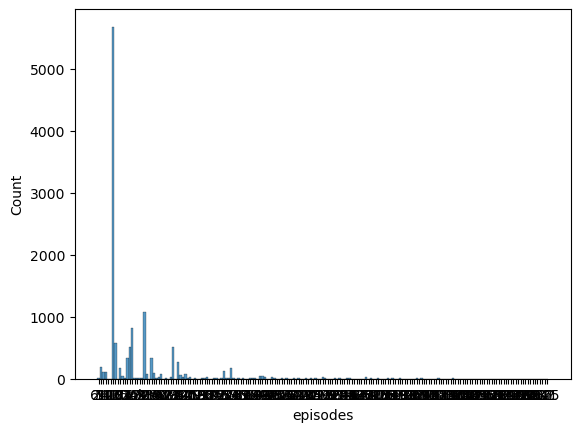

In [11]:
sns.histplot(dataset["episodes"])
plt.show()

In [16]:
# Calculating the first and third quartiles
q1 = dataset["members"].quantile(0.25)
q3 = dataset["members"].quantile(0.75)
iqr = q3 - q1

In [17]:
# Calculating the minimum and maximum range limits
min_r = q1 - (1.5 * iqr)
max_r = q3 + (1.5 * iqr)
min_r, max_r

(-13593.0, 23255.0)

In [18]:
# Filtering the dataset to keep only values below the maximum threshold
dataset[dataset["members"] <= max_r]

,anime_id,name,genre,type,episodes,rating,members
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
63,21899,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,2,8.60,11104
103,11917,Major: World Series,"Comedy, Drama, Sports",OVA,2,8.50,13405
111,2921,Ashita no Joe 2,"Drama, Sports",TV,47,8.48,6259
119,2559,Romeo no Aoi Sora,"Adventure, Drama, Historical, Slice of Life",TV,33,8.47,15074
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


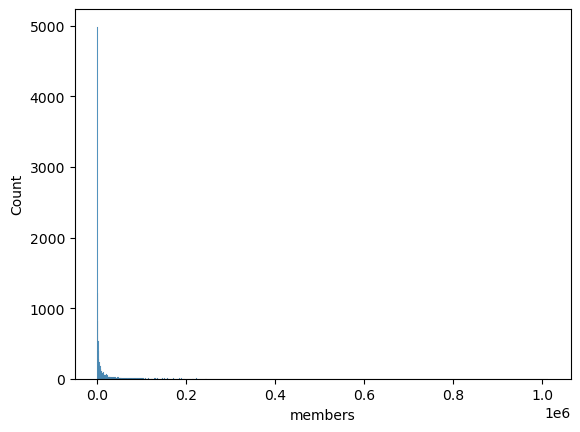

In [19]:
sns.histplot(dataset["members"])
plt.show()

In [20]:
from sklearn.preprocessing import FunctionTransformer

In [23]:
ft = FunctionTransformer(func=np.log1p)

In [24]:
ft.fit(dataset[["members"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [25]:
ft.transform(dataset[["members"]])

,members
0,12.209223
1,13.584418
2,11.646258
3,13.420352
4,11.926802
...,...
12289,5.356586
12290,5.214936
12291,5.393628
12292,5.170484


In [26]:
dataset["members_tf"] = ft.transform(dataset[["members"]])

C:\Users\pts\AppData\Local\Temp\ipykernel_17424\938071520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["members"])
C:\Users\pts\AppData\Local\Temp\ipykernel_17424\938071520.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["members_tf"])


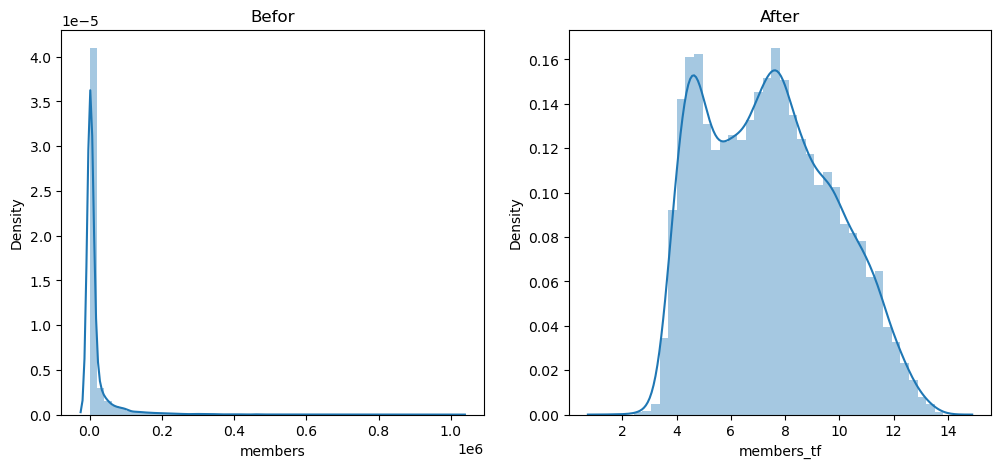

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(dataset["members"])
plt.title("Befor")

plt.subplot(1,2,2)
sns.distplot(dataset["members_tf"])
plt.title("After")
plt.show()

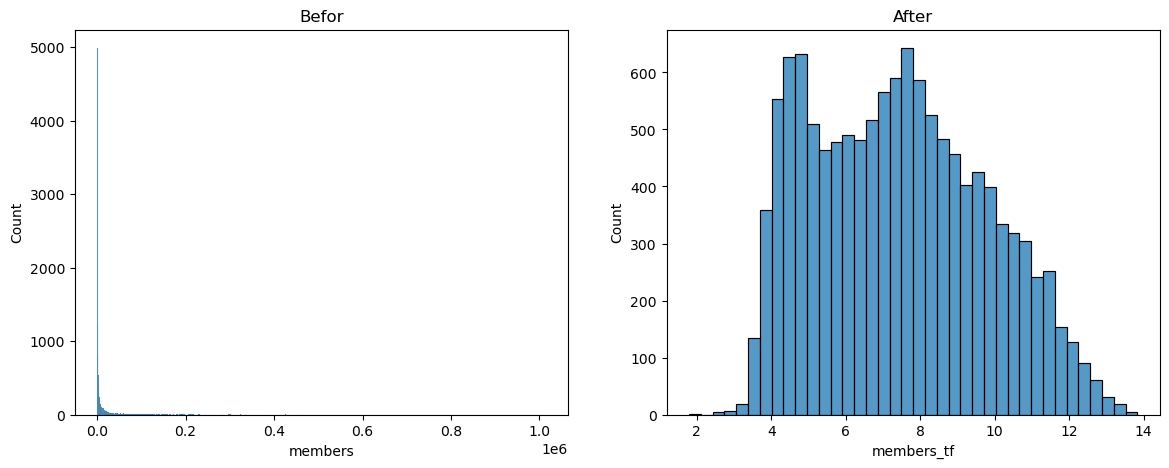

In [34]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(dataset["members"])
plt.title("Befor")

plt.subplot(1,2,2)
sns.histplot(dataset["members_tf"])
plt.title("After")
plt.show()

In [37]:
ft1 = FunctionTransformer(func= lambda x : x**2)
ft1.fit(dataset[["members"]])
dataset["members_tf1"] = ft1.transform(dataset[["members"]])



C:\Users\pts\AppData\Local\Temp\ipykernel_17424\2487342459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["members"])
C:\Users\pts\AppData\Local\Temp\ipykernel_17424\2487342459.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["members_tf1"])


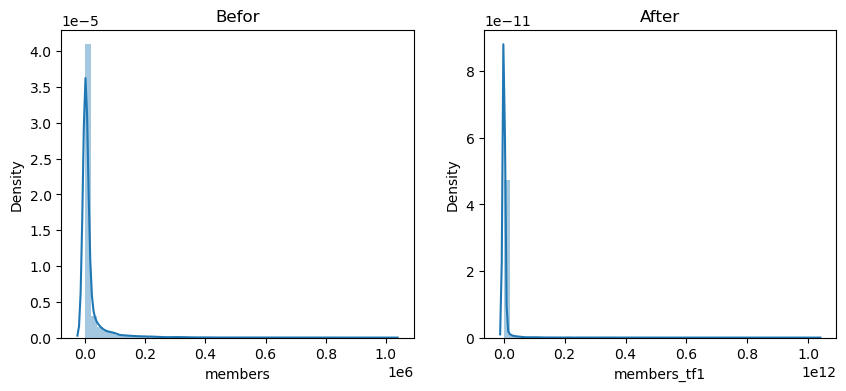

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["members"])
plt.title("Befor")

plt.subplot(1,2,2)
sns.distplot(dataset["members_tf1"])
plt.title("After")
plt.show()